# Farm X Product Team - Case Study

In this Jupyter notebook report, I have performed exploratory data analysis for historical data in India to give insights on crop production and give recommendation on what crops, seasons and states Farm X Product Team should focus their MVP launch.

# Executive Overview

Prior to the Exploratory Data Analysis, I performed Data Wrangling to the given dataset. I removed all duplicated values, extra white spaces in before, in between and after each text as well as null values to guarantee the intergrity of the dataset.
I grouped the seasons into three: Kharif, Rabi, Zari and Whole_Year as india has only three crop seasons. I have also assumed that the Production means how much of the crops were produced.


The first section focuses on the total production of all crops over all 19 years i.e 1997 - 2015 and compared it with the total production of crops from 2005 to 2015 to see if there was a significant change in the volume of the crops produced. From the comparison, there were no significant changes regarding the total production. The top 5 producing crops for both cases were Coconut, Sugarcane, Rice, Wheat and Potato. 

Further investigation was done to identify the seasons and areas these crops grow in the most. Coconut grows mostly in the whole year and produces more in Kerala state. Sugarcane also grow the whole year and produces more in Uttar Pradesh state. Rice was produced mosty in the Kharif season and in West Bengal state. Wheat and Potato were produced mostly in Rabi season in produced more in Uttar Pradesh and Bihar respectively. I suggest that the MVP is launched in these seasons in their respective states.

My entire process that led to this conclusion can be seen in the report below


In [1]:
#Importing libraries

#Data Wrangling
import numpy as np
import pandas as pd

#Data Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sn
import geopandas as gpd
import rasterio
import contextily as ctx
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Data Cleaning

Before I start with the analysis, I will clean the data to ensure that there are no duplicates or null values that could affect the results.

In [2]:
farm = pd.read_csv('CropProductionStatistics.csv')
print(f'In this dataset there are {np.shape(farm)[0]} row and {np.shape(farm)[1]} columns')
#removing duplicates and null values
farm = farm.drop_duplicates().dropna()
print(f'The clean data has {np.shape(farm)[0]} rows and {np.shape(farm)[1]} columns') #has only null values

# convert the 'Date' column to datetime format
import datetime
farm['Crop_Year'] = pd.to_datetime(farm['Crop_Year'], format='%Y')
farm.head()


In this dataset there are 246091 row and 7 columns
The clean data has 242361 rows and 7 columns


State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Kharif        
1  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Kharif        
2  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Kharif        
3  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0

Next, I will remove all extra white spaces from the columns, then validate the datatype for each columns

In [3]:
#removing white spaces
columns = ['State_Name', 'District_Name', 'Season', 'Crop']
for i in columns:
    farm[i] = farm[i].str.replace('  ',' ').str.strip()
    
farm.head()

State_Name District_Name  Crop_Year      Season  \
0  Andaman and Nicobar Islands      NICOBARS 2000-01-01      Kharif   
1  Andaman and Nicobar Islands      NICOBARS 2000-01-01      Kharif   
2  Andaman and Nicobar Islands      NICOBARS 2000-01-01      Kharif   
3  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Whole Year   
4  Andaman and Nicobar Islands      NICOBARS 2000-01-01  Whole Year   

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0

The above function has removed all the extra white spaces from the entire table. This will increase the accuracy of the dataset and prevent error when calling each feature. I did not include the numerical tables in the cleaning because excel automatically arranges numerical values.                                                                                                  Next, I will check the data type to ensure that all the input of each column are of the correct datatype.

In [4]:
#Datatype Validation
print('The data types of each columns are:')
farm.dtypes

The data types of each columns are:


State_Name               object
District_Name            object
Crop_Year        datetime64[ns]
Season                   object
Crop                     object
Area                    float64
Production              float64
dtype: object

I have crosschecked with the dataset and all the datatypes are the correct format. Next, I will use nunique() to count the total numbers of unique features on each column

In [5]:
farm.nunique() #confirming the unique values in each column

State_Name          33
District_Name      646
Crop_Year           19
Season               6
Crop               124
Area             38391
Production       51627
dtype: int64

Research show that India only has 3 seasons but our dataset shows 6 seasons. I will look into the seasons presented in this dataset to clarify.

In [6]:
# Checking the unique values for each Seasons
farm['Season'].unique()

array(['Kharif', 'Whole Year', 'Autumn', 'Rabi', 'Summer', 'Winter'],
      dtype=object)

The links below verifies the following crop seasons:                                                                           
1. Kharif also known as Autumn is between July to October
2. Rabi also known  as Winter is between October to March
3. Zaid also known as Summer is between March to June                                                                             
http://arthapedia.in/index.php/Cropping_seasons_of_India-_Kharif_%26_Rabi                                                       
https://timesofagriculture.com/agriculture-crop-seasons-in-india/

Therefore, the above reasons will justify my action to convert 'Autumn' to 'Kharif', 'Winter' to 'Rabi', and 'Summer' to 'Zaid' making a total of 3 seasons and also the crops that grow the 'whole year'.

In [7]:
#using replace method
farm.replace(to_replace = 'Autumn', value = 'Kharif', inplace = True)
farm.replace(to_replace = 'Winter', value = 'Rabi', inplace = True)
farm.replace(to_replace = 'Summer', value = 'Zaid', inplace = True)

#writing the dataframe to another csv file
farm.to_csv('ValidatedCropProductionStatistics.csv', index = False)
farm2 = pd.read_csv('ValidatedCropProductionStatistics.csv')
farm2.head()

State_Name District_Name   Crop_Year      Season  \
0  Andaman and Nicobar Islands      NICOBARS  2000-01-01      Kharif   
1  Andaman and Nicobar Islands      NICOBARS  2000-01-01      Kharif   
2  Andaman and Nicobar Islands      NICOBARS  2000-01-01      Kharif   
3  Andaman and Nicobar Islands      NICOBARS  2000-01-01  Whole Year   
4  Andaman and Nicobar Islands      NICOBARS  2000-01-01  Whole Year   

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0

All the seasons have been formatted. Now I will confirm using nunique() again.

In [8]:
farm2.nunique() #confirming unique values

State_Name          33
District_Name      646
Crop_Year           19
Season               4
Crop               124
Area             38391
Production       51627
dtype: int64

The seasons are 4 as expected i.e 3 crop seasons and crops that grow the whole year. To confirm, I have used the unique() method again

In [9]:
farm2['Season'].unique() #unique values in Season column

array(['Kharif', 'Whole Year', 'Rabi', 'Zaid'], dtype=object)

The seasons are now 4 in total. I will validate all other columns

In [10]:
farm2['State_Name'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

There are 28 states and 8 Union Territories in India as confirmed in the link below. All states are present in the list of states above and some Union Territories are presented.                                                                         
https://knowindia.india.gov.in/states-uts/

In [11]:
farm2['Crop_Year'].unique()

array(['2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
       '2004-01-01', '2005-01-01', '2006-01-01', '2010-01-01',
       '1997-01-01', '1998-01-01', '1999-01-01', '2007-01-01',
       '2008-01-01', '2009-01-01', '2011-01-01', '2012-01-01',
       '2013-01-01', '2014-01-01', '2015-01-01'], dtype=object)

There are no outragous values in the 'Crop_Year' column

# Data Exploration and Analysis

In this section, I will be gathering general insights from the observation of the data. My first instinct is to know what crops are producing the most across the years, what seasons they are produced more in and what state they are produced more in.

## Highest Crop Production

To get the crop with the highest production, I have summed up the total production of all crops across the 10 years using *groupby* method. I believe that it gives a more recent trend of each of the crops.

In [12]:
# making a dataframe containing years from 2005 to 2015
ten_years_ago = farm2.loc[(farm2['Crop_Year']>='2005-01-01') & (farm2['Crop_Year']<'2016-01-01')]

# summing total production of each crop and sorting in descending order by production
max_crop_10yrs = ten_years_ago.groupby('Crop').sum().sort_values(by='Production', ascending = False).head()
max_crop_10yrs

Area    Production
Crop                                 
Coconut    1.641976e+07  8.289930e+10
Sugarcane  4.463521e+07  3.131131e+09
Rice       4.272763e+08  9.663311e+08
Wheat      2.609813e+08  7.739822e+08
Potato     1.312949e+07  2.597429e+08

From the table above. The top 5 crops with the highest production are **Coconut**, followed by **sugarcane**, then **Rice**, **Wheat**, and **Potato**. I will also check the trend in the last 19 years to see if there are any significant changes.

In [13]:
# summing total production of each crop and sorting in descending order by production
max_crop = farm2.groupby('Crop').sum().sort_values(by='Production', ascending = False)
max_crop.head()

Area    Production
Crop                                 
Coconut    2.833667e+07  1.299816e+11
Sugarcane  7.665622e+07  5.535682e+09
Rice       7.463186e+08  1.605470e+09
Wheat      4.707132e+08  1.332826e+09
Potato     2.223278e+07  4.248263e+08

We can see from the history that the top 5 crops highlighted earlier; **Coconut**, **sugarcane**, **Rice**, **Wheat**, and **Potato** were still the top from 19 years ago. Now I will investigate further into these five crops to see the trend over the years in a line graph. 

<function matplotlib.pyplot.show(close=None, block=None)>

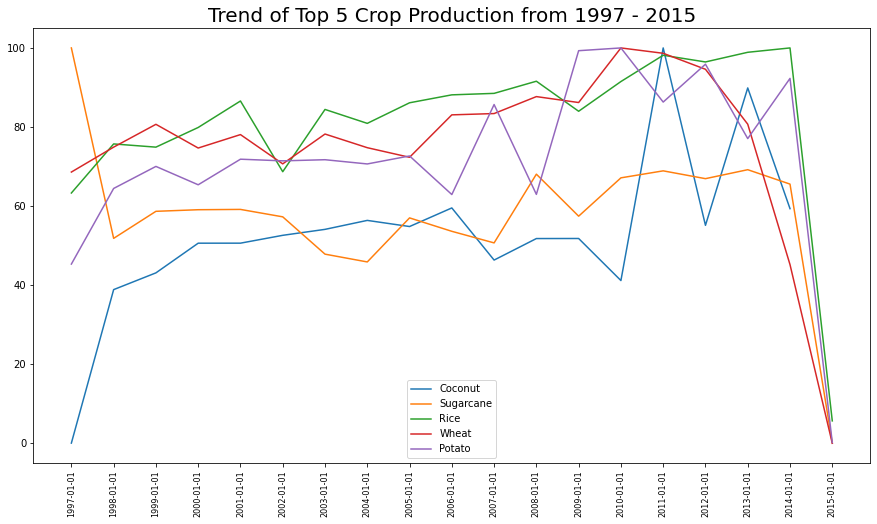

In [14]:
# function to plot line graph showing crop production in 19 years
def crop_df(farm2):
    # importing wanings to ignore
    import warnings
    warnings.filterwarnings("ignore")
    #size of the figure
    plt.rcParams['figure.figsize'] = [15,8]
    fig,ax = plt.subplots(1,1)
    #iterating over top 5 crops
    for i in range(5):
        # iterating over the index of max_crop
        cropname = max_crop.index[i]
        #creating dataframe for each crop
        crop = farm2[farm2["Crop"]== cropname]
        #grouping by Year and summing 
        crop = crop.groupby('Crop_Year').sum()
        #reseting index
        crop = crop.reset_index()
        #creating nan values in list
        crop["Production_Norm"] = np.nan
       
        #iterating over total length of crop df column 
        for j in range(len(crop)):
            # normalizing each crop production to a percentage of the maximum produced crop. 
            crop["Production_Norm"][j] = ((crop['Production'][j])/crop['Production'].max())*100
        #plotting figures
        plt.plot(crop['Crop_Year'], crop['Production_Norm'], label = cropname)
        #formatting fontsize and rotation
        plt.xticks(fontsize = 8, rotation = 90)
        # title
        plt.title('Trend of Top 5 Crop Production from 1997 - 2015', fontsize = 20)
        # plotting legend
        plt.legend()
    
    return plt.show
crop_df(farm2)

I scaled the all the production to be a percentage of the maximum of Coconut production so that all the lines could be visible. Notwithstanding the scale and proportion, the following can be observed from the line graph above:
1. Generally I note that all the crops start to depreciate in the year 2015
2. Coconut being the highest produced crop increases steadily from 1997 to 2004 were it experienced a slight drop and flunctuated till 2011 were there was a sharp peak in production. There was a drastic flunctuation between the years 2011 to 2014 but the highest peak was 2011.
3. Sugarcane started 1998 with a massive decrease in production from the year 1997 and remained stable from 1999 to 2002. The production rate is farely stable from the year 2005 to 2015.
4. Rice production increased generally from 1997 to 2015 but with a drop in the year 2002, 2009 and 2015.
5. Wheat has a steady increase from the year 1997 to 2010 where it starts dropping till 2015.
6. Between the year 1997 and 2005, Potat production was stable, In 2007 and 2009, it rose up signifiantly and began to fall in the year 2010.    

I will be representing all the total production for all the crops in across all years in a barchart in order to know the crops that are least producing.

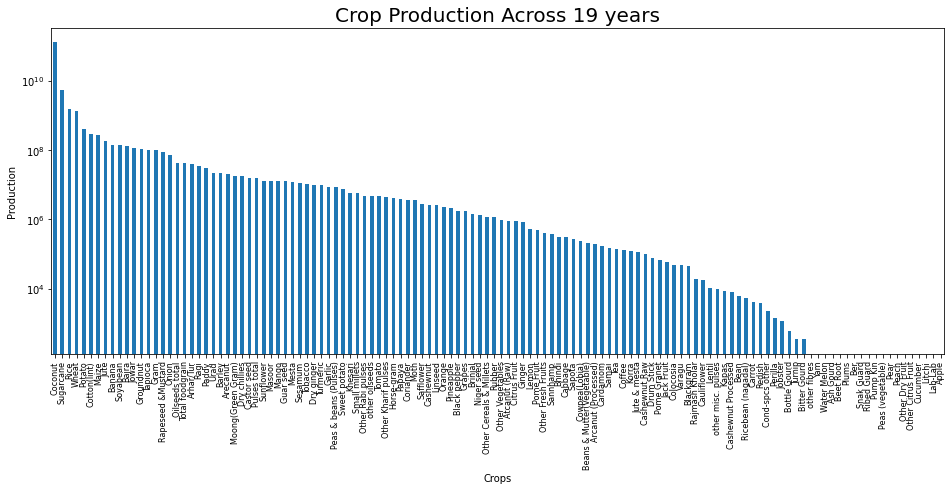

In [15]:
max_crop['Production'].plot(kind = 'bar', figsize = (16,6))
plt.yscale('log')
plt.xticks(fontsize = 8, rotation = 90)
plt.title('Crop Production Across 19 years', fontsize = 20)
plt.xlabel('Crops')
plt.ylabel('Production')
plt.show()

From the graph above, the crops Other Fibres, Yam, Water Melon, Ash Gourd, Beet Root, Rums, Ber, Snak Guard, Peas (vegetable), Pear, Peach, Other Dry Fruit, Other Citrus Fruit, Cucumber, Litchi, Lab-Lab and Apple are barely producing in india. Therefore, it is not advisable to launch the MVP for these crops. 

## Crop Production per Season

In this section, the three seasons will be analyzed to know what crops are produced more.

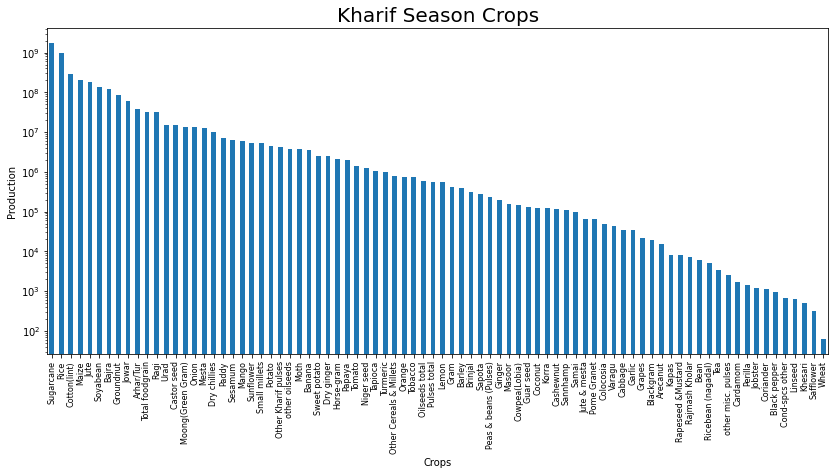

In [16]:
# selecting Kharif season dataframe
kharif = farm2[farm2['Season']=='Kharif']
#Sorting Values by total crop production
kharif = kharif.groupby('Crop').sum().sort_values(by='Production', ascending = False)
#plotting barchart
kharif['Production'].plot(kind = 'bar', figsize = (14,6))
#scaling yaxis for all values to fit in plot
plt.yscale('log')
#formatting xticks
plt.xticks(fontsize = 8, rotation = 90)
plt.xlabel('Crops')
plt.ylabel('Production')
plt.title('Kharif Season Crops',fontsize = 20)
plt.show()

The top 5 produced crops in Kharif Season are:
1. Sugarcane
2. Rice
3. Cotton(lint)
4. Maize
5. Soyabean                                                                                                                     

The bottom produced crops in Kharif season are:
1. Wheat
2. Safflower
3. Khesari
4. Linseed
5. Cond-spcs other

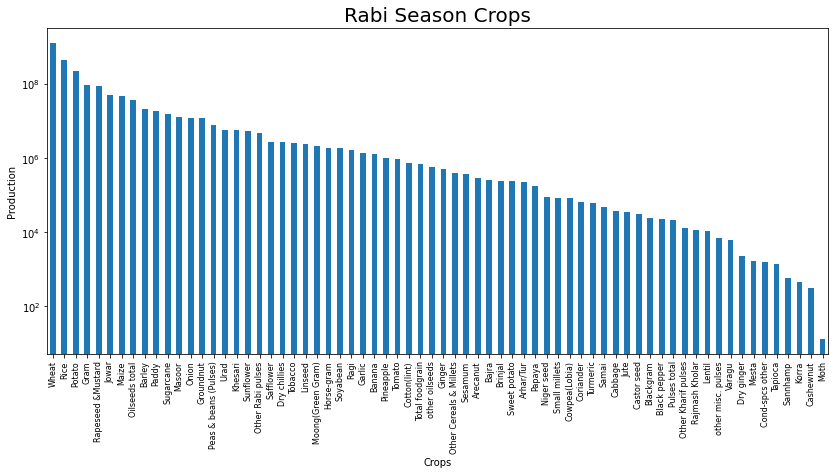

In [17]:
# selecting Rabi season dataframe
rabi = farm2[farm2['Season']=='Rabi']
#Sorting Values by total crop production
rabi = rabi.groupby('Crop').sum().sort_values(by='Production', ascending = False)
#plotting barchart
rabi['Production'].plot(kind = 'bar', figsize = (14,6))
#scaling yaxis for all values to fit in plot
plt.yscale('log')
#formatting xticks
plt.xticks(fontsize = 8, rotation = 90)
plt.xlabel('Crops')
plt.ylabel('Production')
plt.title('Rabi Season Crops',fontsize = 20)
plt.show()

The top 5 crops produced in the Rabi Season are:
1. Wheat
2. Rice
3. Potato
4. Gram
5. Rapeseed & Mustard

The bottom 5 crops produces in the Rabi Season are:
1. Moth
2. Cashewnut
3. Korra
4. Sannhamp
5. Tapioca

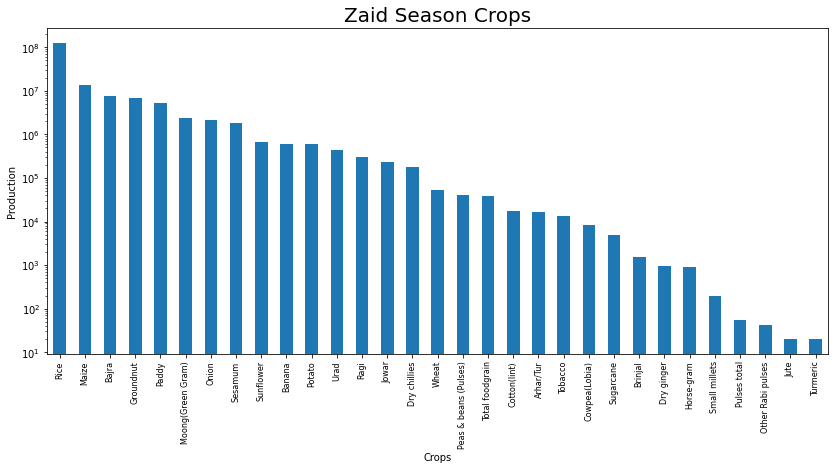

In [18]:
# selecting Zaid season dataframe
zaid = farm2[farm2['Season']=='Zaid']
#Sorting Values by total crop production
zaid = zaid.groupby('Crop').sum().sort_values(by='Production', ascending = False)
#plotting barchart
zaid['Production'].plot(kind = 'bar', figsize = (14,6))
#scaling yaxis for all values to fit in plot
plt.yscale('log')
#formatting xticks
plt.xticks(fontsize = 8, rotation = 90)
plt.xlabel('Crops')
plt.ylabel('Production')
plt.title('Zaid Season Crops',fontsize = 20)
plt.show()

The graph reveals that not many crops are grown during the Zaid season, however, the following are the top 5 crops in the Zaid season:
1. Rice
2. Maize
3. Bajira
4. Groundnut
5. Raddy

While the least producing crops are:
1. Tumeric
2. Jute
3. Other Rabi pulses
4. Pulses total
5. Small millets

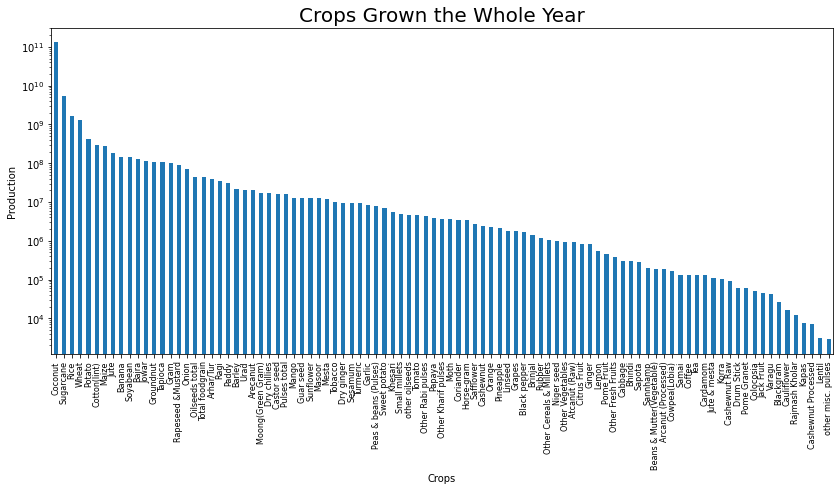

In [19]:
# selecting Whole Year dataframe
whole_year = farm2[farm2['Production']>1000]
#Sorting Values by total crop production
whole_year = whole_year.groupby('Crop').sum().sort_values(by='Production', ascending = False)
#plotting barchart
whole_year['Production'].plot(kind = 'bar', figsize = (14,6))
#scaling yaxis for all values to fit in plot
plt.yscale('log')
#formatting xticks
plt.xticks(fontsize = 8, rotation = 90)
plt.xlabel('Crops')
plt.ylabel('Production')
plt.title('Crops Grown the Whole Year',fontsize = 20)
plt.show()

The top 5 produced in the Whole Year include:
1. Coconut
2. Sugarcane
3. Potato
4. Banana
5. Tapioca

## Total Crops Produced per State

In this section, I will be analyzing the impact of the total crops produced per state meaning that I will be checking for areas where the crops are produced the most. I will be imploying the geopandas library

In [20]:
#Recalling original dataframe
farm2.head()

State_Name District_Name   Crop_Year      Season  \
0  Andaman and Nicobar Islands      NICOBARS  2000-01-01      Kharif   
1  Andaman and Nicobar Islands      NICOBARS  2000-01-01      Kharif   
2  Andaman and Nicobar Islands      NICOBARS  2000-01-01      Kharif   
3  Andaman and Nicobar Islands      NICOBARS  2000-01-01  Whole Year   
4  Andaman and Nicobar Islands      NICOBARS  2000-01-01  Whole Year   

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0

In the next steps, I will group by the State, Crop and Crop Year, I want to have a dataframe with these values so that I can write a function that to selects a particular year and show the distribution of the total population of that crop across all the states of india. 

In [21]:
#creating a dataframe containing State_Name, Crop and Crop_Year
farm3 = farm2.groupby(['State_Name','Crop','Crop_Year', 'Season']).sum().reset_index()
farm3.head()

State_Name      Crop   Crop_Year      Season     Area  \
0  Andaman and Nicobar Islands  Arecanut  2000-01-01      Kharif  4354.00   
1  Andaman and Nicobar Islands  Arecanut  2001-01-01      Kharif  4354.00   
2  Andaman and Nicobar Islands  Arecanut  2002-01-01  Whole Year  4363.00   
3  Andaman and Nicobar Islands  Arecanut  2003-01-01  Whole Year  4379.00   
4  Andaman and Nicobar Islands  Arecanut  2004-01-01  Whole Year  4425.37   

   Production  
0     7200.00  
1     7300.00  
2     7350.00  
3     6707.00  
4     4781.05

I will be performing spatial analysis which is an important for visualizing data related to agriculture. I belive it is important to see the land covered with crops. It is visually pleasing and easy to understand. For the fist steps, I will be importing 'Point' and 'Polygon'from the shapely library. Shapely package is useful for manipulating the planar features from the GEOs library.

In [22]:
from shapely.geometry import Point, Polygon

I have downloaded and imported the indian state administrative shapefile. It contains the coordinates of all the states.

<AxesSubplot:>

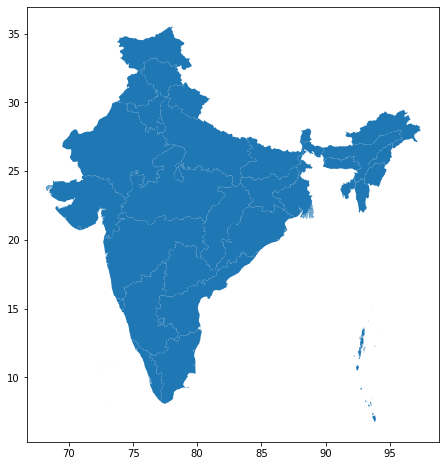

In [23]:
# importing india shapefile
india_map = gpd.read_file(r'C:\Users\user\Documents\Data Analytics\Case Study\IND_adm\IND_adm1.shp')
india_map.plot()

This is how the imported the data looks like.

In [24]:
india_map.head()

ID_0  ISO NAME_0  ID_1               NAME_1          TYPE_1  \
0   105  IND  India     1  Andaman and Nicobar  Union Territor   
1   105  IND  India     2       Andhra Pradesh           State   
2   105  IND  India     3    Arunachal Pradesh           State   
3   105  IND  India     4                Assam           State   
4   105  IND  India     5                Bihar           State   

         ENGTYPE_1 NL_NAME_1  \
0  Union Territory      None   
1            State      None   
2            State      None   
3            State      None   
4            State      None   

                                           VARNAME_1  \
0  Andaman & Nicobar Islands|Andaman et Nicobar|I...   
1                                               None   
2  Agence de la Frontière du Nord-Est(French-obso...   
3                                               None   
4                                               None   

                                            geometry  
0  MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
1  MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...  
2  POLYGON ((96.15778 29.38310, 96.16380 29.37668...  
3  MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...  
4  MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...

I will group by 'NAME_1' column which contains the state names. I want to see how many states are in the file

In [25]:
india_map.groupby("NAME_1").head()

ID_0  ISO NAME_0  ID_1                  NAME_1          TYPE_1  \
0    105  IND  India     1     Andaman and Nicobar  Union Territor   
1    105  IND  India     2          Andhra Pradesh           State   
2    105  IND  India     3       Arunachal Pradesh           State   
3    105  IND  India     4                   Assam           State   
4    105  IND  India     5                   Bihar           State   
5    105  IND  India     6              Chandigarh  Union Territor   
6    105  IND  India     7            Chhattisgarh           State   
7    105  IND  India     8  Dadra and Nagar Haveli  Union Territor   
8    105  IND  India     9           Daman and Diu  Union Territor   
9    105  IND  India    10                   Delhi  Union Territor   
10   105  IND  India    11                     Goa           State   
11   105  IND  India    12                 Gujarat           State   
12   105  IND  India    13                 Haryana           State   
13   105  IND  India    14        Himachal Pradesh  Union Territor   
14   105  IND  India    15       Jammu and Kashmir           State   
15   105  IND  India    16               Jharkhand           State   
16   105  IND  India    17               Karnataka           State   
17   105  IND  India    18                  Kerala           State   
18   105  IND  India    19             Lakshadweep  Union Territor   
19   105  IND  India    20          Madhya Pradesh           State   
20   105  IND  India    21             Maharashtra           State   
21   105  IND  India    22                 Manipur           State   
22   105  IND  India    23               Meghalaya           State   
23   105  IND  India    24                 Mizoram           State   
24   105  IND  India    25                Nagaland           State   
25   105  IND  India    26                  Orissa           State   
26   105  IND  India    27              Puducherry  Union Territor   
27   105  IND  India    28                  Punjab           State   
28   105  IND  India    29               Rajasthan           State   
29   105  IND  India    30                  Sikkim           State   
30   105  IND  India    31              Tamil Nadu           State   
31   105  IND  India    32               Telangana           State   
32   105  IND  India    33                 Tripura           State   
33   105  IND  India    34           Uttar Pradesh           State   
34   105  IND  India    35             Uttaranchal           State   
35   105  IND  India    36             West Bengal           State   

          ENGTYPE_1 NL_NAME_1  \
0   Union Territory      None   
1             State      None   
2             State      None   
3             State      None   
4             State      None   
5   Union Territory      None   
6             State      None   
7   Union Territory      None   
8   Union Territory      None   
9   Union Territory      None   
10            State      None   
11            State      None   
12            State      None   
13  Union Territory      None   
14            State      None   
15            State      None   
16            State      None   
17            State      None   
18  Union Territory      None   
19            State      None   
20            State      None   
21            State      None   
22            State      None   
23            State      None   
24            State      None   
25            State      None   
26  Union Territory      None   
27            State      None   
28            State      None   
29            State      None   
30            State      None   
31            State      None   
32            State      None   
33            State      None   
34            State      None   
35            State      None   

                                            VARNAME_1  \
0   Andaman & Nicobar Islands|Andaman et Nicobar|I...   
1                                                None   
2   Agence de la Fro

In [26]:
# checking the coordinate reference system of the map.
# the crs tells python how the coordinates relates to places on the earth
india_map.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Now we have the coordinates, I will extract only the geometry and State Name because I want to merge the geometry to the farm3 pandas dataframe

In [27]:
india_maps = india_map[['NAME_1','geometry']]
india_maps['State_Name'] = india_maps['NAME_1']
india_maps = india_maps.drop(columns = ['NAME_1'])
india_maps

geometry              State_Name
0   MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...     Andaman and Nicobar
1   MULTIPOLYGON (((80.27458 13.45958, 80.27458 13...          Andhra Pradesh
2   POLYGON ((96.15778 29.38310, 96.16380 29.37668...       Arunachal Pradesh
3   MULTIPOLYGON (((89.87145 25.53730, 89.87118 25...                   Assam
4   MULTIPOLYGON (((88.10548 26.53904, 88.10505 26...                   Bihar
5   POLYGON ((76.80293 30.67548, 76.79437 30.66932...              Chandigarh
6   POLYGON ((83.32760 24.09965, 83.34575 24.09707...            Chhattisgarh
7   POLYGON ((73.02468 20.09630, 73.01955 20.10502...  Dadra and Nagar Haveli
8   MULTIPOLYGON (((72.86014 20.47096, 72.86340 20...           Daman and Diu
9   POLYGON ((77.32713 28.68516, 77.32539 28.68250...                   Delhi
10  MULTIPOLYGON (((73.78181 15.35569, 73.78181 15...                     Goa
11  MULTIPOLYGON (((70.86097 20.75292, 70.86097 20...                 Gujarat
12  POLYGON ((76.83715 30.87887, 76.85243 30.87069...                 Haryana
13  POLYGON ((76.80276 33.23666, 76.80630 33.23623...        Himachal Pradesh
14  POLYGON ((77.89957 35.42789, 77.90297 35.42759...       Jammu and Kashmir
15  POLYGON ((87.59989 25.31466, 87.60688 25.31138...               Jharkhand
16  MULTIPOLYGON (((74.67097 13.19986, 74.67097 13...               Karnataka
17  MULTIPOLYGON (((76.46736 9.54097, 76.46736 9.5...                  Kerala
18  MULTIPOLYGON (((73.01014 8.28042, 73.01014 8.2...             Lakshadweep
19  POLYGON ((78.36465 26.86884, 78.36688 26.86259...          Madhya Pradesh
20  MULTIPOLYGON (((73.45597 15.88986, 73.45597 15...             Maharashtra
21  POLYGON ((94.57723 25.64833, 94.57609 25.64470...                 Manipur
22  POLYGON ((91.85384 26.10479, 91.86470 26.10035...               Meghalaya
23  POLYGON ((92.80080 24.41905, 92.80370 24.41879...                 Mizoram
24  POLYGON ((95.21445 26.93695, 95.21706 26.93420...                Nagaland
25  MULTIPOLYGON (((84.76986 19.10597, 84.76986 19...                  Orissa
26  MULTIPOLYGON (((79.84486 10.82653, 79.84486 10...              Puducherry
27  POLYGON ((75.86877 32.48868, 75.88712 32.47203...                  Punjab
28  POLYGON ((73.88944 29.97761, 73.89118 29.97007...               Rajasthan
29  POLYGON ((88.64526 28.09912, 88.65411 28.08984...                  Sikkim
30  MULTIPOLYGON (((77.55596 8.07903, 77.55596 8.0...              Tamil Nadu
31  POLYGON ((78.33625 19.88319, 78.34669 19.88140...               Telangana
32  POLYGON ((92.18520 24.52287, 92.18896 24.52019...                 Tripura
33  POLYGON ((77.58468 30.40878, 77.58639 30.40801...           Uttar Pradesh
34  POLYGON ((79.19478 31.35362, 79.19817 31.35196...             Uttaranchal
35  MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...             West Bengal

This dataset has 35 indian states, that is 3 more compared to our pandas dataset 'farm2'. I also noticed that the spelling of Orissa, Uttaranchal and Andaman and Nicobar are differnt compared to what is found on out pandas dataset, but never-the-less- they mean the exact same names. The one in the shapefile are the old names of the state, our dataset contain the more recent names 'Andaman and Nicobar Islands', 'Odisha' and 'Uttarakhand'. Therefore, I will replace the names of our Dataset to fit with the shape file so that the merge function will work well.

In [28]:
#merging the shapefile coordinates to the farm3 dataframe
india_location = pd.merge(farm3, india_maps, on = 'State_Name', how = 'left')
#checking the coordinates that didnot merge
c = india_location[india_location.geometry==None]
#selecting the unique values that didnot merge
c.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Odisha', 'Uttarakhand'],
      dtype=object)

In [29]:
# replacing the farm3 state names to match the shapefile
india_maps.replace(to_replace = 'Andaman and Nicobar', value = 'Andaman and Nicobar Islands', inplace = True)
india_maps.replace(to_replace = 'Orissa', value = 'Odisha', inplace = True)
india_maps.replace(to_replace = 'Uttaranchal', value = 'Uttarakhand', inplace = True)
# merging the two datasets
india_location = pd.merge(farm3, india_maps, on = 'State_Name', how = 'left')
india_location

State_Name      Crop   Crop_Year      Season  \
0      Andaman and Nicobar Islands  Arecanut  2000-01-01      Kharif   
1      Andaman and Nicobar Islands  Arecanut  2001-01-01      Kharif   
2      Andaman and Nicobar Islands  Arecanut  2002-01-01  Whole Year   
3      Andaman and Nicobar Islands  Arecanut  2003-01-01  Whole Year   
4      Andaman and Nicobar Islands  Arecanut  2004-01-01  Whole Year   
...                            ...       ...         ...         ...   
15382                  West Bengal     Wheat  2010-01-01        Rabi   
15383                  West Bengal     Wheat  2011-01-01        Rabi   
15384                  West Bengal     Wheat  2012-01-01        Rabi   
15385                  West Bengal     Wheat  2013-01-01        Rabi   
15386                  West Bengal     Wheat  2014-01-01        Rabi   

            Area  Production  \
0        4354.00     7200.00   
1        4354.00     7300.00   
2        4363.00     7350.00   
3        4379.00     6707.00   
4        4425.37     4781.05   
...          ...         ...   
15382  316808.00   874415.00   
15383  315659.00   872895.00   
15384  321572.00   895927.00   
15385  331481.00   927837.00   
15386  334640.00   939254.00   

                                                geometry  
0      MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
1      MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
2      MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
3      MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
4      MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
...                                                  ...  
15382  MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...  
15383  MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...  
15384  MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...  
15385  MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...  
15386  MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...  

[15387 rows x 7 columns]

Now we have the Pandas dataframe of the State, crop, years, production and geometry, i will convert it to a geopandas dataframe for easy computation

In [30]:
#converting to a geopandas dataframe
india_geo = gpd.GeoDataFrame(india_location, geometry = 'geometry')
india_geo

State_Name      Crop   Crop_Year      Season  \
0      Andaman and Nicobar Islands  Arecanut  2000-01-01      Kharif   
1      Andaman and Nicobar Islands  Arecanut  2001-01-01      Kharif   
2      Andaman and Nicobar Islands  Arecanut  2002-01-01  Whole Year   
3      Andaman and Nicobar Islands  Arecanut  2003-01-01  Whole Year   
4      Andaman and Nicobar Islands  Arecanut  2004-01-01  Whole Year   
...                            ...       ...         ...         ...   
15382                  West Bengal     Wheat  2010-01-01        Rabi   
15383                  West Bengal     Wheat  2011-01-01        Rabi   
15384                  West Bengal     Wheat  2012-01-01        Rabi   
15385                  West Bengal     Wheat  2013-01-01        Rabi   
15386                  West Bengal     Wheat  2014-01-01        Rabi   

            Area  Production  \
0        4354.00     7200.00   
1        4354.00     7300.00   
2        4363.00     7350.00   
3        4379.00     6707.00   
4        4425.37     4781.05   
...          ...         ...   
15382  316808.00   874415.00   
15383  315659.00   872895.00   
15384  321572.00   895927.00   
15385  331481.00   927837.00   
15386  334640.00   939254.00   

                                                geometry  
0      MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
1      MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
2      MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
3      MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
4      MULTIPOLYGON (((93.78773 6.85264, 93.78849 6.8...  
...                                                  ...  
15382  MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...  
15383  MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...  
15384  MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...  
15385  MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...  
15386  MULTIPOLYGON (((88.01861 21.57278, 88.01889 21...  

[15387 rows x 7 columns]

In [31]:
#checking the type of the new geodataframe
type(india_geo)

geopandas.geodataframe.GeoDataFrame

Next, i will be writing a function that selects the crop and represents the total production on the map for a particular year. The aim is to visually see the states that produced the most Crop. The colorbar shows the range of the total crop production. The darkest color has the highest production and the lightest color has the lowest production value.

In [32]:
#color bar is inverted
def production_year(year,crop):
    #selecting crop and year
    a = india_geo[(india_geo['Crop']==crop) & (india_geo['Crop_Year']==year)]
    # normalizing color bar
    norm = colors.Normalize(vmin= a["Production"].min(), vmax=a["Production"].max())
    cbar = plt.cm.ScalarMappable(norm=norm, cmap='Greens')
    # we reproject to match contextily map
    a = a.to_crs({'init': 'epsg:3857'})
    # plot
    fig, ax = plt.subplots(figsize=(25, 20))
    a.plot(column='State_Name', cmap='Greens_r', legend=False, ax=ax , alpha = 1.0)
    a["coords"] = a["geometry"].apply(lambda x: x.representative_point().coords[:])
    a["coords"] = [coords[0] for coords in a["coords"]]
    for idx, row in a.iterrows():
        plt.annotate(text=row["State_Name"], xy=row["coords"], horizontalalignment='center', color='magenta', fontsize = 14, fontname = "calibri")
    # add colorbar

    ax_cbar = fig.colorbar(cbar, ax=ax)
    # add label for the colorbar
    ax_cbar.set_label(f'{crop} Crop Production in Year {year[0:4]}', fontsize = 16)
    ctx.add_basemap(ax)
    return ax

Now, I can filter out a year and visually see the total crop production in states.

<AxesSubplot:>

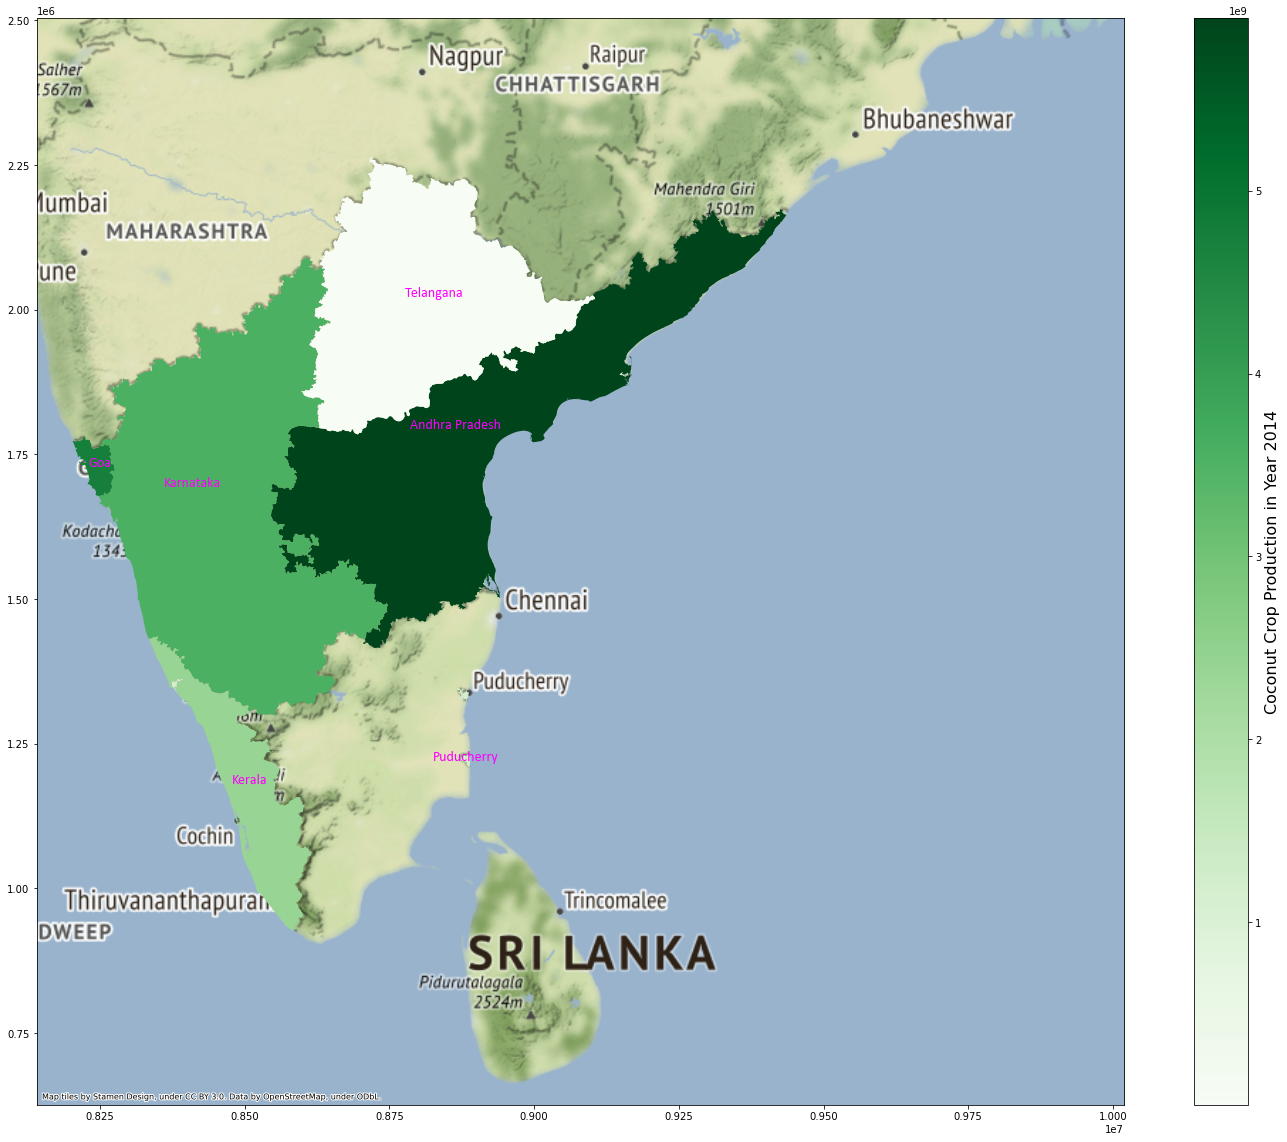

In [33]:
production_year('2014-01-01','Coconut')

I have written a similar function that selects a crop and shows the average total production for throughout the 19 years. I will do this for the top 5 crops: Coconut, Sugarcane, Rice, Wheat and Rice. Then, I will create a table showing its impact in terms of seasons.

In [34]:
# function to plot total crop production across all years on map
import matplotlib.colors as colors
def mean_year(crop):
    india_geo2 = india_geo.groupby(['State_Name','Crop']).mean().sort_values(by = 'Production', ascending = False).reset_index().head()
    india_geo2 = pd.merge(farm3, india_maps, on = 'State_Name', how = 'left')
    india_geo2 = gpd.GeoDataFrame(india_geo2, geometry = 'geometry')
    
    
    a = india_geo2[india_geo2['Crop']==crop]
   
    # we reproject to match contextily map
    a = a.to_crs({'init': 'epsg:3857'})
    # plot
    fig, ax = plt.subplots(figsize=(25, 20))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
   
    a.plot(column='Production',
           ax=ax, cax = cax, cmap = 'Greens',
           legend=True,
           legend_kwds={'label': f"{crop} Production in Year",
                        'orientation': "vertical"}, alpha = 0.4)
    a["coords"] = a["geometry"].apply(lambda x: x.representative_point().coords[:])
    a["coords"] = [coords[0] for coords in a["coords"]]
    
    ctx.add_basemap(ax)
    return ax

<AxesSubplot:>

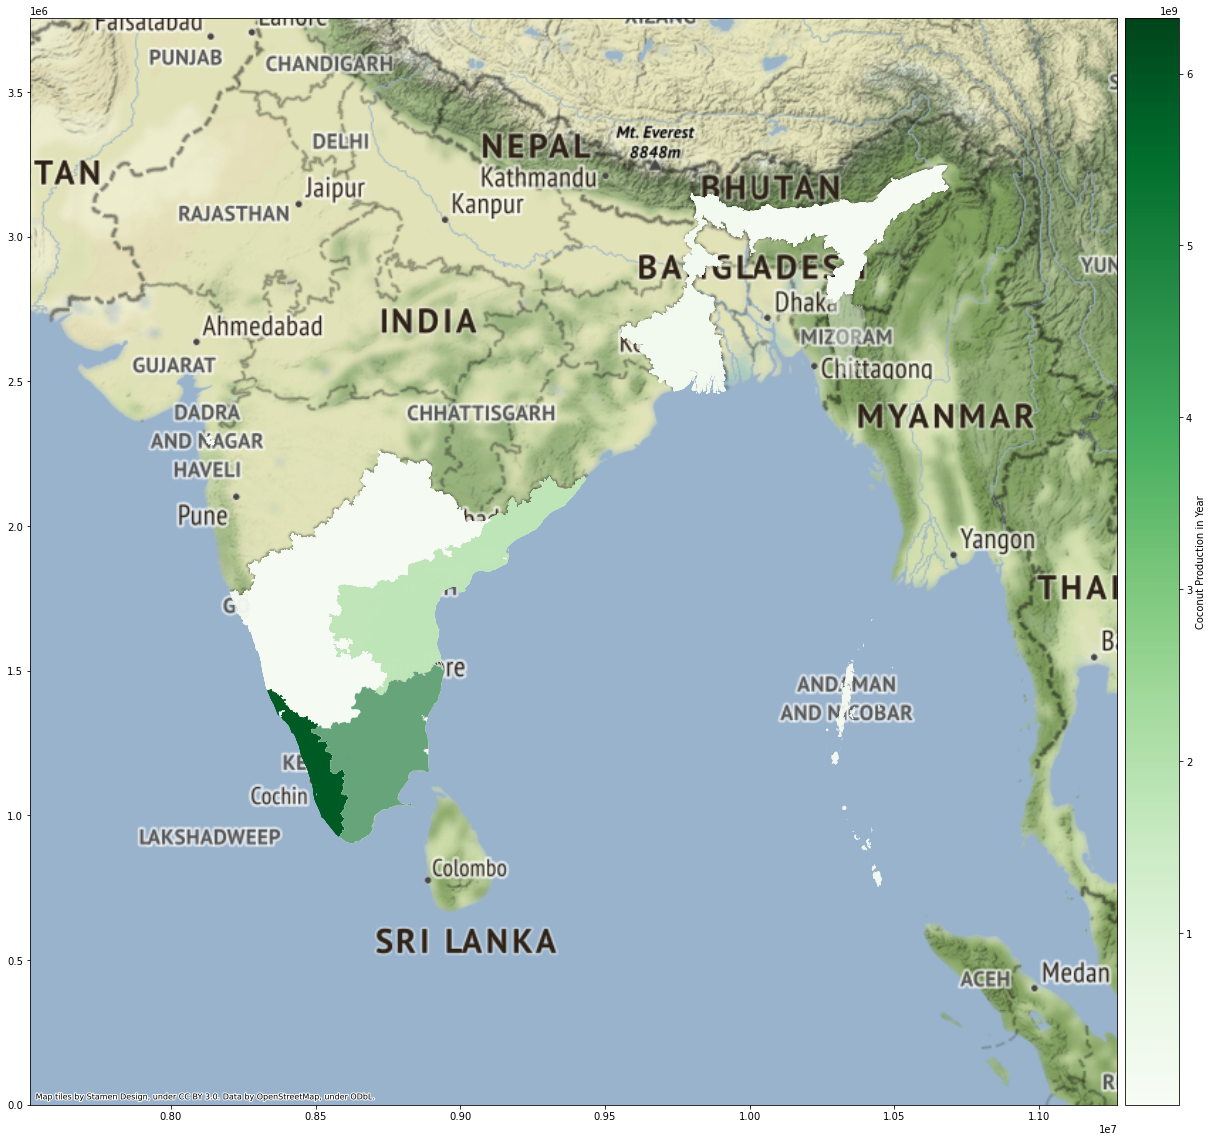

In [35]:
#average production of coconut
mean_year('Coconut')

From the map, we can easily see that the states that coconut grows mostly in Kerala state and least in Mizoram

I will create a dataframe from the 'india_geo' dataframe in order to be able to select the season it grows best in.

In [36]:
#creating dataframe for only coconut
coconut_season = india_geo[india_geo['Crop']=='Coconut']
#highest season
coconut_season.groupby('Season').sum().sort_values(by = 'Production',ascending = False).reset_index()

Season         Area    Production
0  Whole Year  28334575.32  1.299815e+11
1      Kharif      2094.00  1.265920e+05

Coconut grows all year round

In [37]:
coconut_season.groupby('Season').sum().sort_values(by = 'Production',ascending = False).reset_index()

Season         Area    Production
0  Whole Year  28334575.32  1.299815e+11
1      Kharif      2094.00  1.265920e+05

In [38]:
# highest state
coconut_season.groupby('State_Name').sum().sort_values(by = 'Production',ascending = False).reset_index().head()

State_Name         Area    Production
0          Kerala  15504052.07  9.780304e+10
1  Andhra Pradesh   1332907.00  1.680600e+10
2      Tamil Nadu   3777232.00  1.093774e+10
3           Assam    322687.00  1.954408e+09
4     West Bengal    304317.00  7.178412e+08

The highest producing state for Coconut is Kerala

In [39]:
# lowest state
coconut_season.groupby('State_Name').sum().sort_values(by = 'Production',ascending = False).reset_index().tail()

State_Name       Area    Production
7               Puducherry    30829.0  3.791390e+08
8                Telangana    10592.0  1.056730e+08
9                Karnataka  6708655.0  5.676710e+07
10  Dadra and Nagar Haveli     1640.0  1.172880e+05
11                 Mizoram       15.0  4.000000e+01

The lowest producing state for Coconut is Mizoram

Now, I will do the same for Sugarcane

<AxesSubplot:>

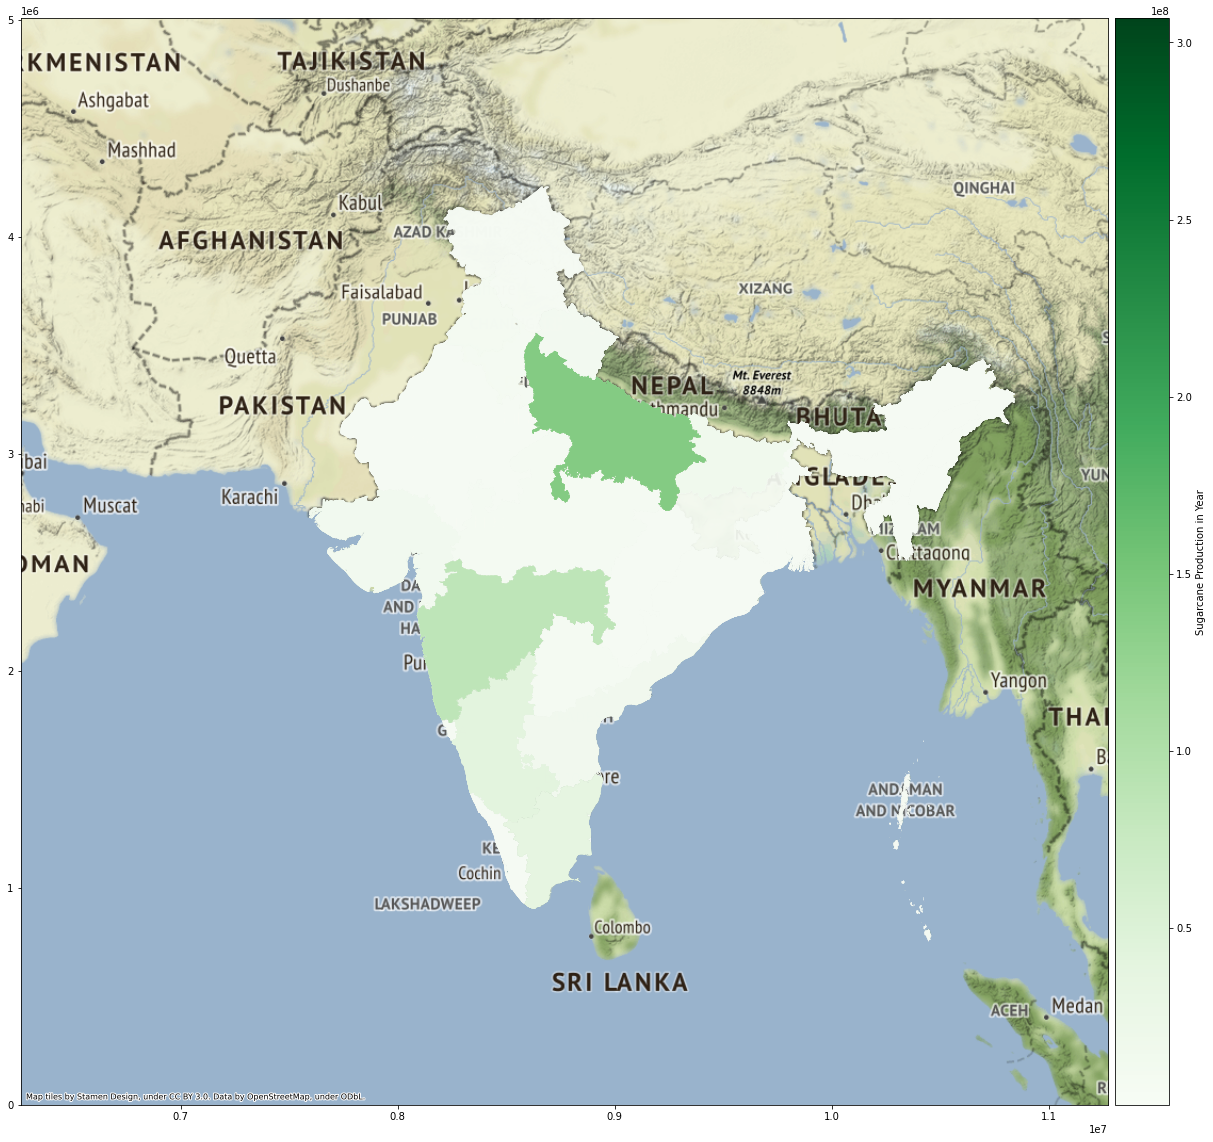

In [40]:
mean_year('Sugarcane')

From the map we can see that Sugarcane grows almost everywhere in India. More precisely in 30 out of the 33 states in india. The best state is in Uttar Pradesh and least in Meghalaya.

I will also select a geodataframe from the 'india_geo' dataframe to know the season it grows best in.

In [41]:
#selecting dataframe for sugarcane alone
sugarcane_season = india_geo[(india_geo['Crop']=='Sugarcane')]
#best season
sugarcane_season.groupby('Season').sum().sort_values(by = 'Production',ascending = False).reset_index()

Season         Area    Production
0  Whole Year  48118891.52  3.745173e+09
1      Kharif  28284261.23  1.774458e+09
2        Rabi    252920.00  1.604495e+07
3        Zaid       150.00  4.900000e+03

From the table we can see that Sugarcane grows the whole year but mostly in the Kharif season 

In [42]:
# highest state
sugarcane_season.groupby('State_Name').sum().sort_values(by = 'Production',ascending = False).reset_index().head()

State_Name        Area    Production
0   Uttar Pradesh  37469967.0  2.202875e+09
1     Maharashtra  11514728.0  9.384860e+08
2      Tamil Nadu   5269202.0  8.474968e+08
3       Karnataka   5739787.0  5.158455e+08
4  Andhra Pradesh   2948672.0  2.267303e+08

We can see that Sugarcane grows best in Uttar Pradesh

In [43]:
# lowest state
sugarcane_season.groupby('State_Name').sum().sort_values(by = 'Production',ascending = False).reset_index().tail()

State_Name     Area  Production
26                      Manipur  4137.00   134912.00
27                    Jharkhand  2566.82    82173.01
28  Andaman and Nicobar Islands  1504.51    30638.67
29            Jammu and Kashmir  2237.00     4968.70
30                    Meghalaya  1541.00     4286.00

Sugarcan is produced the least in Meghalaya

<AxesSubplot:>

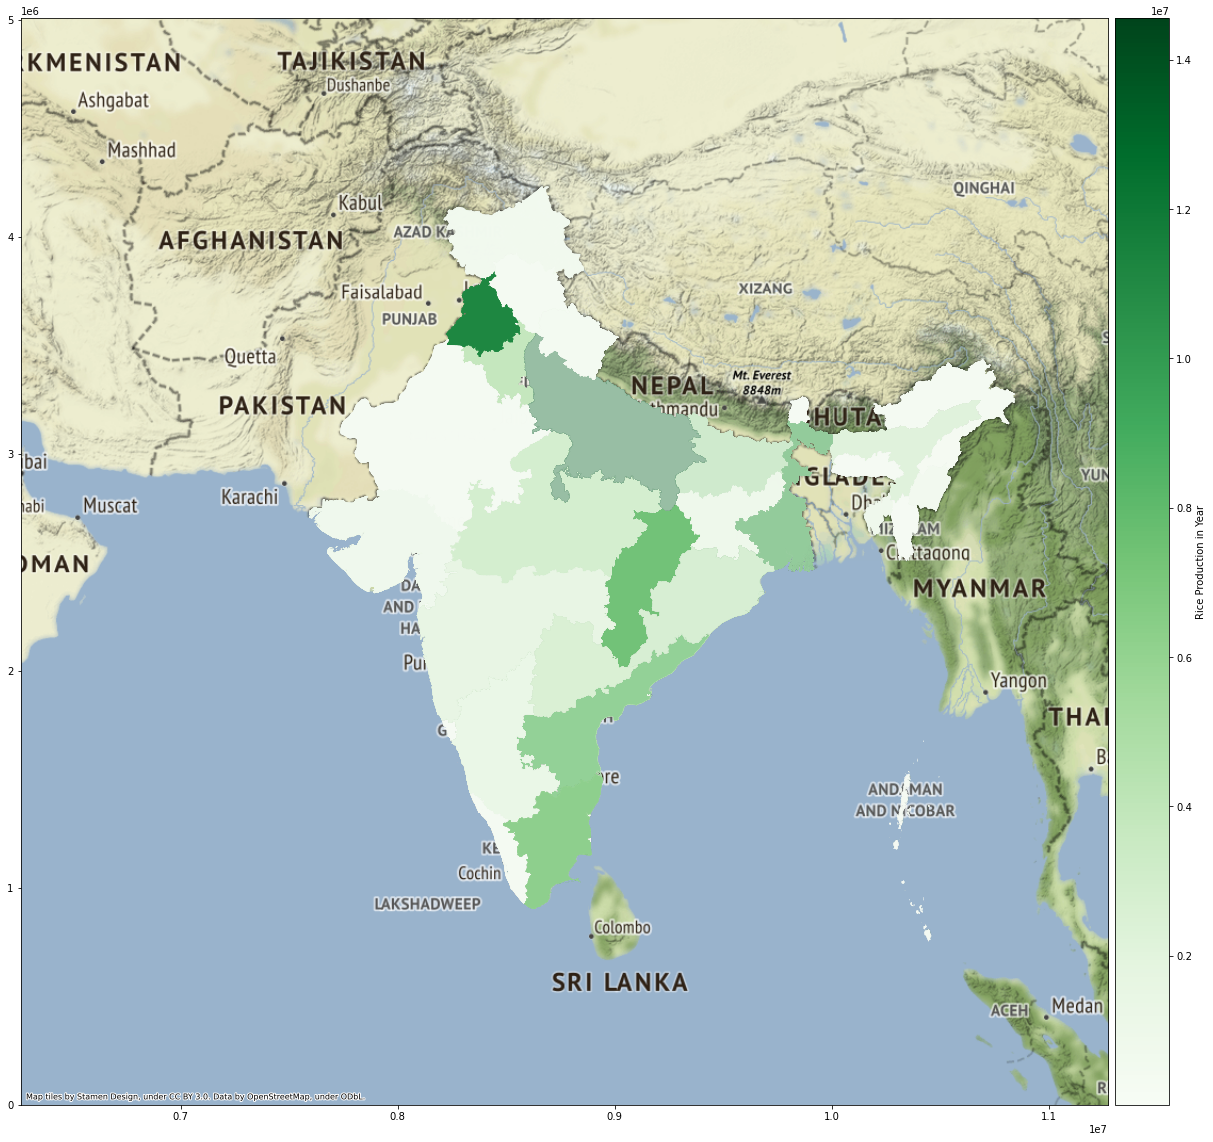

In [44]:
mean_year('Rice')

In [45]:
# creating dataframe
rice_season = farm2[(farm2['Crop']=='Rice')]
#sorting rice by season
rice_season.groupby('Season').sum().sort_values(by = 'Production',ascending = False).reset_index()

Season          Area    Production
0      Kharif  4.600443e+08  9.935103e+08
1        Rabi  2.268789e+08  4.656908e+08
2        Zaid  5.209057e+07  1.277028e+08
3  Whole Year  7.304836e+06  1.856645e+07

We can see from the table above that ricae grows in all the seasons but mostly in the Kharif season.

In [46]:
rice_season.groupby('State_Name').sum().sort_values(by = 'Production',ascending = False).reset_index().head()

State_Name         Area   Production
0     West Bengal  101993454.0  258092849.0
1   Uttar Pradesh  103380331.0  218793359.0
2          Punjab   48099000.0  179702000.0
3  Andhra Pradesh   46548311.0  143742455.0
4          Odisha   85677043.0  119422742.0

In [47]:
rice_season.groupby('State_Name').sum().sort_values(by = 'Production',ascending = False).reset_index().tail()

State_Name       Area  Production
28                   Puducherry  385197.00   985958.00
29       Dadra and Nagar Haveli  230982.00   454865.00
30                       Sikkim  225617.00   383136.00
31  Andaman and Nicobar Islands   77714.93   223006.06
32                   Chandigarh     850.00     3853.00

From the table above we can see that rice grows the least in Chandigarh

<AxesSubplot:>

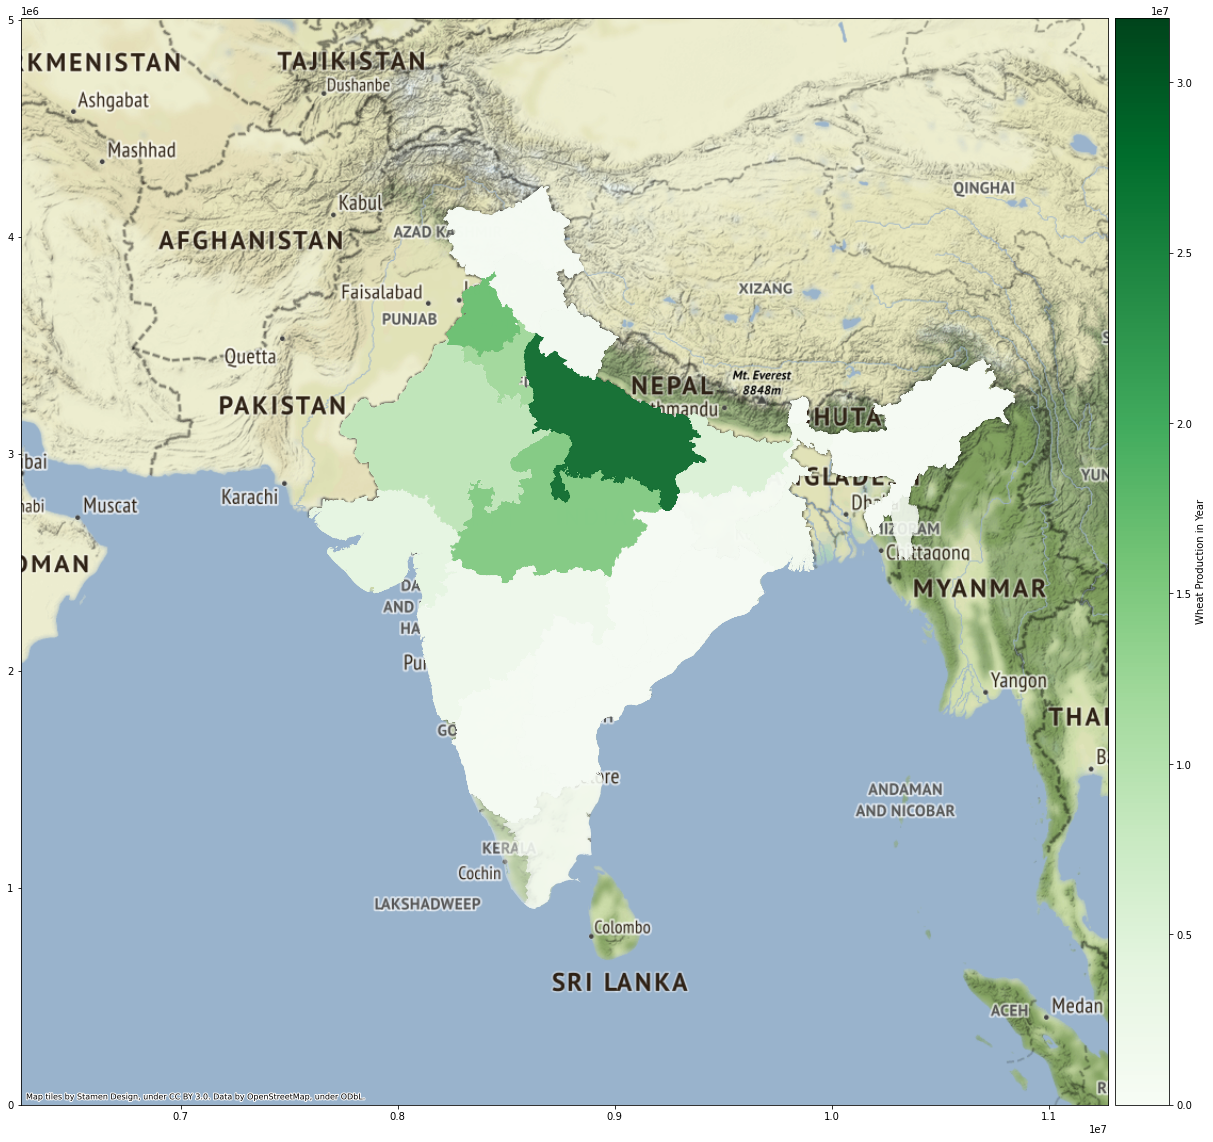

In [48]:
#calling function for wheat
mean_year('Wheat')

In [49]:
#creating dataframe
wheat_season = farm2[(farm2['Crop']=='Wheat')]
#checking seasons
wheat_season.groupby('Season').sum().sort_values(by = 'Production',ascending = False).reset_index()

Season          Area    Production
0        Rabi  4.662167e+08  1.323907e+09
1  Whole Year  4.459344e+06  8.865630e+06
2        Zaid  3.672500e+04  5.269320e+04
3      Kharif  4.560000e+02  6.180000e+01

We can see from the table that Wheat grows mostly in the Rabi Season

In [50]:
#checking highest state
wheat_season.groupby('State_Name').sum().sort_values(by = 'Production',ascending = False).reset_index().head()

State_Name         Area   Production
0   Uttar Pradesh  168614377.0  469911750.0
1          Punjab   62138000.0  276946000.0
2         Haryana   37734933.0  158647000.0
3  Madhya Pradesh   74390328.0  147153856.0
4       Rajasthan   33613521.0   94669124.0

We can see from the table that Wheat grows mostly in Uttar Pradesh

In [51]:
#checking lowest state
wheat_season.groupby('State_Name').sum().sort_values(by = 'Production',ascending = False).reset_index().tail()

State_Name     Area  Production
24  Dadra and Nagar Haveli   9015.0     17134.0
25          Andhra Pradesh  16208.0     10595.0
26              Tamil Nadu    875.0       110.0
27                 Mizoram    123.0       101.0
28                  Kerala      1.0         3.0

The table shows that Kerala is the least producing state for Wheat

<AxesSubplot:>

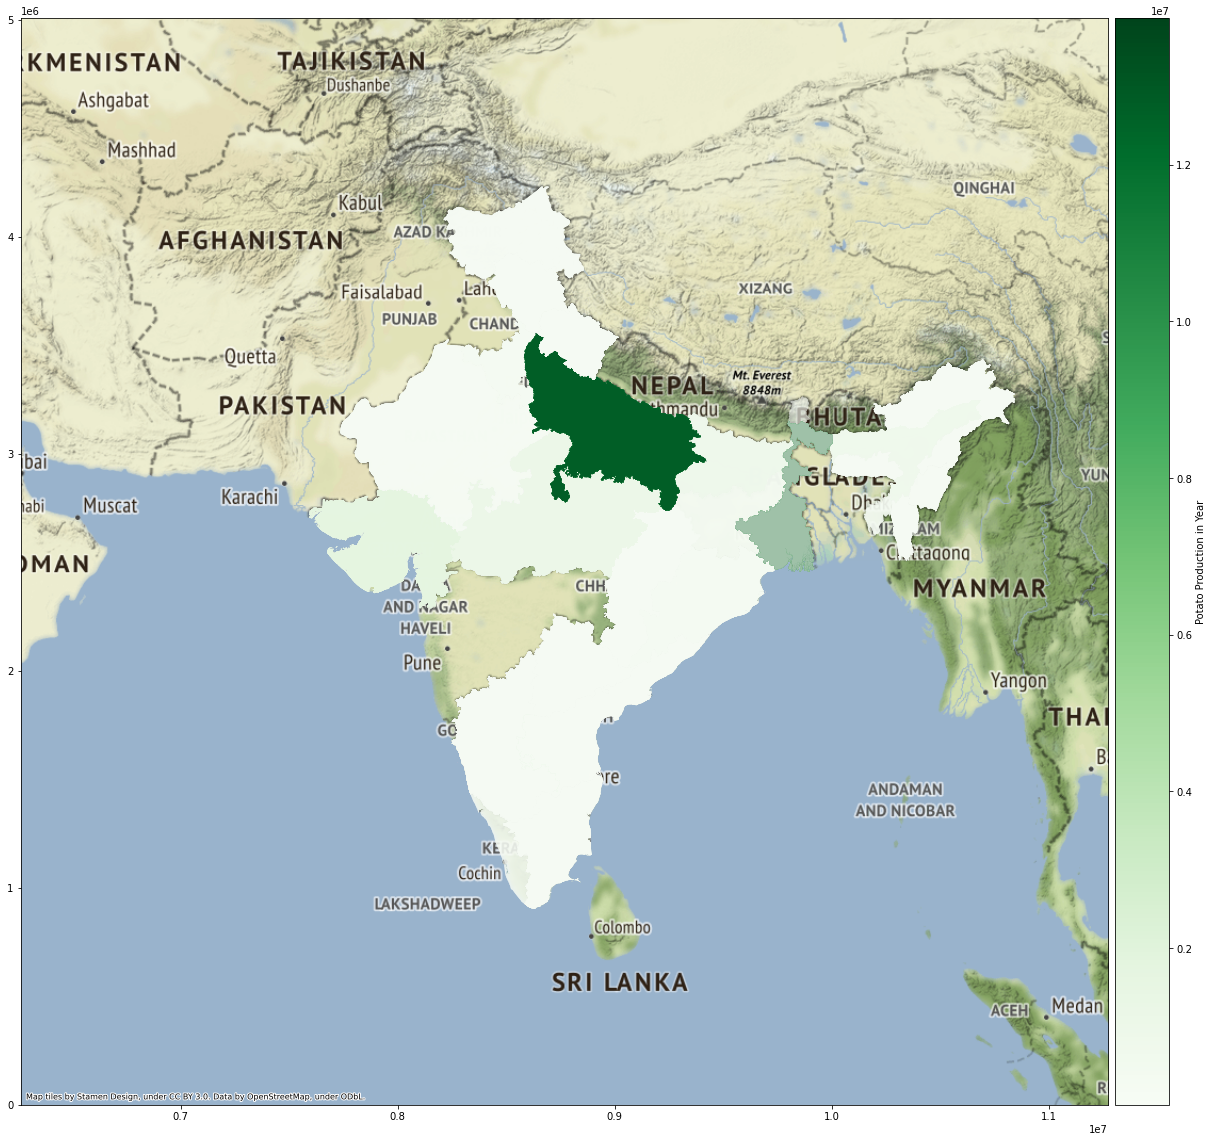

In [52]:
#Calling mean_year function for Potato
mean_year('Potato')

In [53]:
c#creating dataframe
potato_season = farm2[(farm2['Crop']=='Potato')]
# checking seasons with the highest production
potato_season.groupby('Season').sum().sort_values(by = 'Production',ascending = False).reset_index()

Season         Area    Production
0        Rabi   9417209.67  2.212848e+08
1  Whole Year  12137156.00  1.985014e+08
2      Kharif    633121.00  4.453649e+06
3        Zaid     45297.00  5.864120e+05

We can see that Potato grows mainly in the Rabi season

In [54]:
#checking highest state
potato_season.groupby('State_Name').sum().head(5).sort_values(by = 'Production',ascending = False).reset_index().head()

State_Name       Area  Production
0              Bihar  1576835.0  14035519.0
1              Assam  1480254.0  11021521.0
2  Arunachal Pradesh    76510.0    578571.0
3     Andhra Pradesh    19814.0    216449.0
4         Chandigarh      583.0     13795.0

From the table we can see that Bihar produces potato most.

In [55]:
#checking lowest producing state
potato_season.groupby('State_Name').sum().sort_values(by = 'Production',ascending = False).reset_index().tail()

State_Name     Area  Production
22  Jammu and Kashmir  12609.0    126900.9
23             Sikkim  13230.0     60460.0
24             Kerala   2972.0     54534.0
25            Mizoram   4683.0     21163.0
26         Chandigarh    583.0     13795.0

From the table, we can see that Potato grow the least in Chandigarh

From the insights I will create a dataframe containing the top 5 producing crops, the states they grow best in and the season that they are best produced in. This will give an idea on the best action to take for the MVP lunch.

In [56]:
df = {'Crop' : ['Coconut','Sugarcane','Rice','Wheat','Potato'],
      'Best Season': ['Whole_Year','Whole_Year','Kharif','Rabi','Rabi'],
      'Highest State' : ['Kerala','Uttar Pradesh','West Bengal','Uttar Pradesh','Bihar'],
      'Lowest State' : ['Mizoram','Meghalaya','Chandigarh','Kerala','Chandigarh']}

best_producing = pd.DataFrame(df)
best_producing

Crop Best Season  Highest State Lowest State
0    Coconut  Whole_Year         Kerala      Mizoram
1  Sugarcane  Whole_Year  Uttar Pradesh    Meghalaya
2       Rice      Kharif    West Bengal   Chandigarh
3      Wheat        Rabi  Uttar Pradesh       Kerala
4     Potato        Rabi          Bihar   Chandigarh

# Recommendation

If given 100,000 Euro for advertising for the MVP Launch. I recommend that billboards should be used for the advertisement because it can be viewed by many people at a time. It should also be placed in strategic regions. I will assign a weighted number to calculate the importance of the above 5 crops.                                                                
1. Coconut = 5
2. Sugarcane = 4
3. Rice = 3
4. Wheat = 2
5. Potato = 1

The total of the numbers = 15. Calculating a fraction of each crops by the total bugdget makes:
1. Coconut = 33,333.33 Euro
2. Sugarcane = 26,666.67 Euro
3. Rice = 20,000 Euro
4. Wheat = 13,333 Euro
5. Potato = 6,666 Euro